In [2]:
# On importe les bibliothèque nécessaire
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
#Base de données d'entrainement
# Connexion à la base de données
conn = sqlite3.connect('train.db')
c = conn.cursor()

#Création du data frame
df_train = pd.read_sql_query("SELECT * from avis", conn)

# Validation de la transaction et fermeture de la connexion
conn.commit()
conn.close()

#Retirer des colonnes
df_train = df_train.drop('rowid', axis = 1)
df_train = df_train.drop('id', axis = 1)

#Valeurs dupliquées
df_train.duplicated().sum()
df_train.drop_duplicates(inplace=True)

#Valeurs manquantes
df_train.isnull().sum()

rating    0
text      0
dtype: int64

In [5]:
# Encodage de la colonne rating
df_train['rating'] = df_train['rating'].apply(lambda x: 0 if x < 5 else 1)

# Charger les données d'entrainement depuis la base de données
x_train = df_train['text']
y_train = df_train['rating']

# x_train est une liste de textes et y_train est une liste d'étiquettes du score
# Convertir les textes en vecteurs numériques avec la vectorisation TF-IDF
vectorizer = TfidfVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)

# On divise les données en ensemble d'entrainement et ensemble de test
x_train_vec, x_test_vec, y_train, y_test = train_test_split(x_train_vectorized, y_train, test_size=0.2, random_state=42)

In [6]:
svm_model_best = SVC(C=1, gamma=0.1, kernel='linear')
svm_model_best.fit(x_train_vec, y_train)

y_pred_svm_b = svm_model_best.predict(x_test_vec)

# Calculer l'exactitude des prédictions
accuracy_svm_b = accuracy_score(y_test, y_pred_svm_b)
precision_svm_b = precision_score(y_test, y_pred_svm_b, average='macro')
recall_svm_b = recall_score(y_test, y_pred_svm_b, average='macro')
f1_score_svm_b = f1_score(y_test, y_pred_svm_b, average='macro')

print("Exactitude de SVM: ", accuracy_svm_b)
print("Précision de SVM: ", precision_svm_b)
print("Rappel de SVM: ", recall_svm_b)
print("F1 score de SVM: ", f1_score_svm_b)

Exactitude de SVM:  0.8859666733587633
Précision de SVM:  0.8863878031655912
Rappel de SVM:  0.8857013844652835
F1 score de SVM:  0.8858589793533308


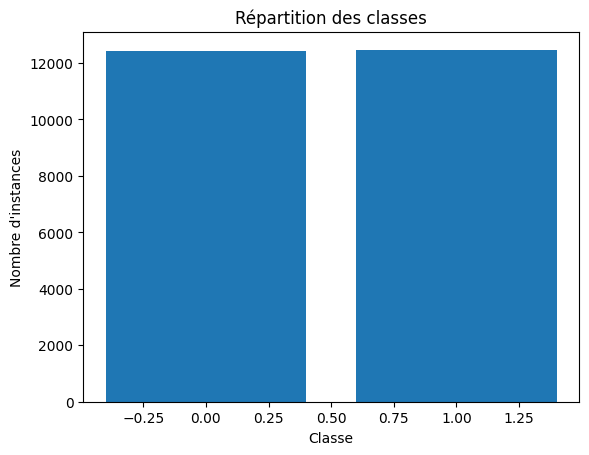

In [10]:
#Graphique en barres pour l'analyse de la répartition des classes

import matplotlib.pyplot as plt

# Compter le nombre d'instances pour chaque classe
counts = df_train['rating'].value_counts()

# Créer un graphique en barres
plt.bar(counts.index, counts.values)

# Ajouter un titre et des labels d'axes
plt.title('Répartition des classes')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'instances')

# Afficher le graphique
plt.show()

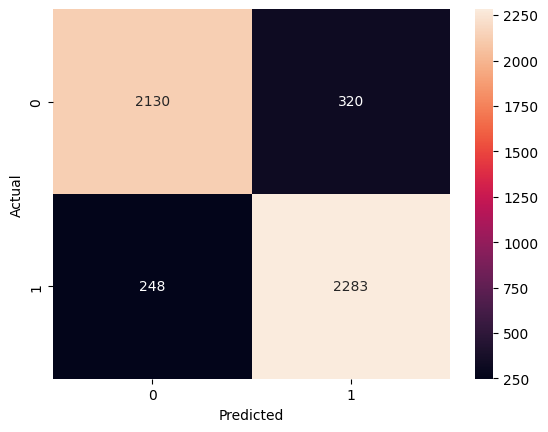

In [7]:
# Matrice de confusion

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_svm_b)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

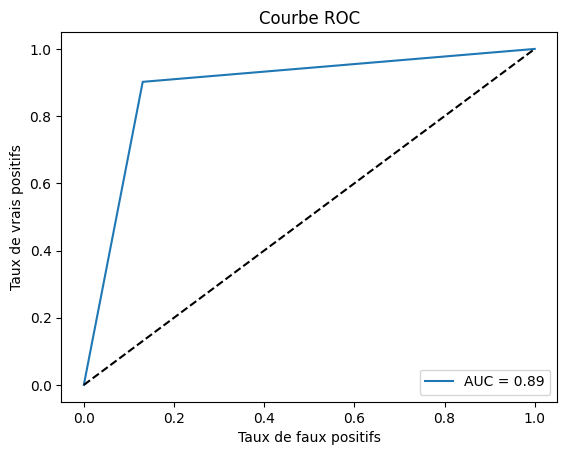

In [18]:
# Graphique en courbes pour l'analyse de la performance du modèle

from sklearn.metrics import roc_curve, auc

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_b)
roc_auc = auc(fpr, tpr)

# Créer un graphique en courbes pour la courbe ROC
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))

# Ajouter une ligne pour la ligne de référence
plt.plot([0, 1], [0, 1], 'k--')

# Ajouter un titre et des labels d'axes
plt.title('Courbe ROC')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc='lower right')

# Afficher le graphique
plt.show()

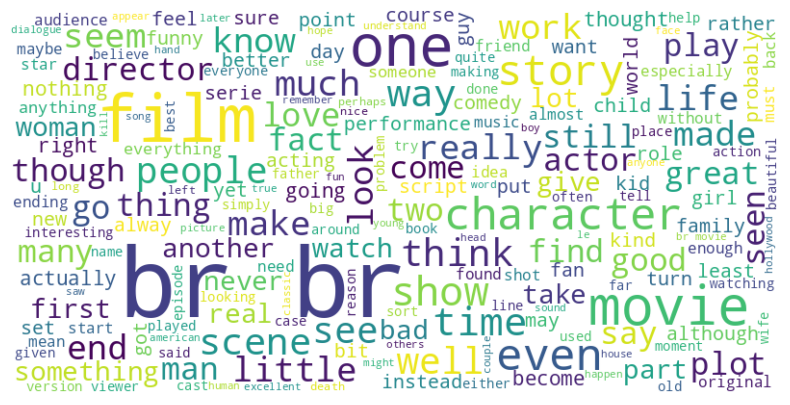

In [19]:
from wordcloud import WordCloud

# Join all texts into a single string
text = " ".join(review for review in df_train.text)

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color="white").generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()